## Emotion Recognition  
* In this notebook, we'll conduct experiments to train the model.
* We'll use different machine leaning algorithms to train models and then evaluate their performance.
* The model that perform best on our data will be used in our emotion recognition system.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import GradientBoostingClassifier

**Load Data**

In [29]:
data = np.loadtxt('../data.txt')

**Split data into features `(X)` and labels `(y)`**

In [32]:
X = data[:, :-1]  # All columns except the last one (features)
y = data[:, -1]   # The last column (labels)

In [33]:
X.shape, y.shape

((1388, 1404), (1388,))

**Split the data into training and testing sets (80% train, 20% test)**  
- The `stratify` parameter is used to ensure that the split between the training and testing sets maintains the same proportion of classes as in the original dataset.


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

**Initialize the classifier**

In [35]:
clf = LogisticRegression(solver='lbfgs', max_iter=500)

# clf = RandomForestClassifier(n_estimators=100)

# clf = SVC()

# clf = KNeighborsClassifier()

# clf = GradientBoostingClassifier()

**Train the model**

In [36]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

**Make predictions on the test set**

In [37]:
y_pred = clf.predict(X_test)

**Evaluate the model**

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 77.70%
[[74 16  7]
 [10 66 12]
 [ 9  8 76]]


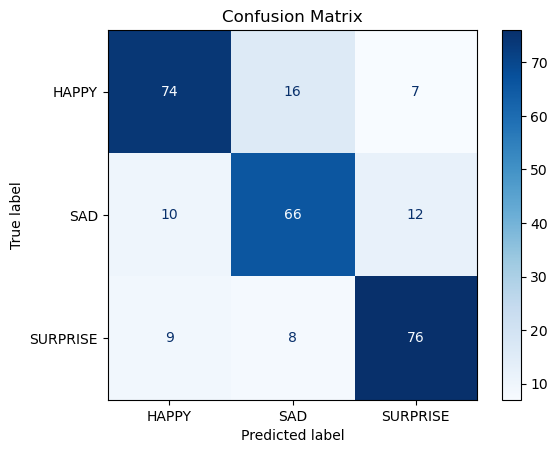

In [41]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HAPPY", "SAD", "SURPRISE"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

---

In [72]:
# Evaluate the model (LogisticRegression)  (solver='lbfgs', max_iter=500)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 77.70%
[[74 16  7]
 [10 66 12]
 [ 9  8 76]]


In [65]:
# Evaluate the model (LogisticRegression) (bydefault [solver='lbfgs', max_iter=500])
"""In scikit-learn, when you create an instance of LogisticRegression, the default solver is indeed set to 
'lbfgs', and the default maximum number of iterations (max_iter) is set to 100.
"""
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 76.62%
[[72 18  7]
 [10 65 13]
 [ 9  8 76]]


In [119]:
# Evaluate the model (XGBoost) - GradientBoostingClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 70.86%
[[68 22  7]
 [19 60  9]
 [11 13 69]]


In [18]:
# Evaluate the model (RandomForestClassifier(n_estimator=100))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 67.27%
[[65 26  6]
 [18 59 11]
 [13 17 63]]


In [32]:
# Evaluate the model (RandomForestClassifier(n_estimators=200))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 65.47%
[[64 26  7]
 [17 59 12]
 [15 19 59]]


In [103]:
# Evaluate the model (SVC)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 67.27%
[[67 21  9]
 [22 45 21]
 [ 8 10 75]]


In [112]:
# Evaluate the model (KNN)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(confusion_matrix(y_test, y_pred))

Accuracy: 58.63%
[[70 21  6]
 [35 40 13]
 [17 23 53]]


---

**Models Accuracy Table**

| Model                           | Accuracy (%) | 
|---------------------------------|--------------|
| LogisticRegression (max_iter=500) | **77.70**  |
| LogisticRegression (default)    | 76.62        |
| XGBoost (GradientBoosting)      | 70.86        |
| RandomForestC (n_estimators=100)| 67.27        |
| RandomForestC (n_estimators=200)| 65.47        |
| SVC                             | 67.27        |
| KNN                             | 58.63        |

**Models Accuracy Comparison**

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


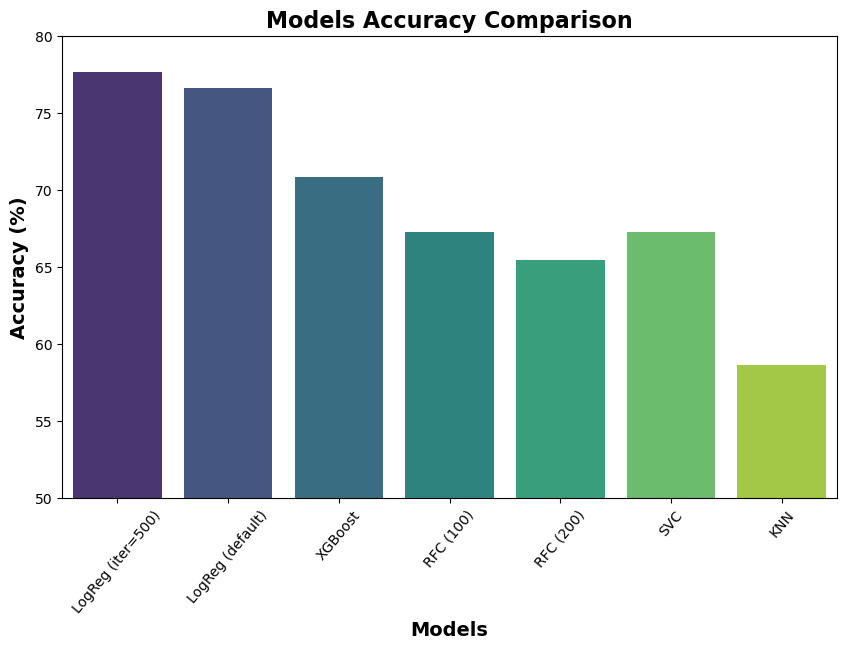

In [58]:
import seaborn as sns

# Data
models = ['LogReg (iter=500)', 'LogReg (default)', 'XGBoost', 'RFC (100)', 'RFC (200)', 'SVC', 'KNN']
accuracy = [77.70, 76.62, 70.86, 67.27, 65.47, 67.27, 58.63]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Models Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylim(50, 80)
plt.xticks(rotation=50)
plt.savefig('models_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

---